In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("non_null_data.csv")

In [4]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'address.postal_code'], axis=1)

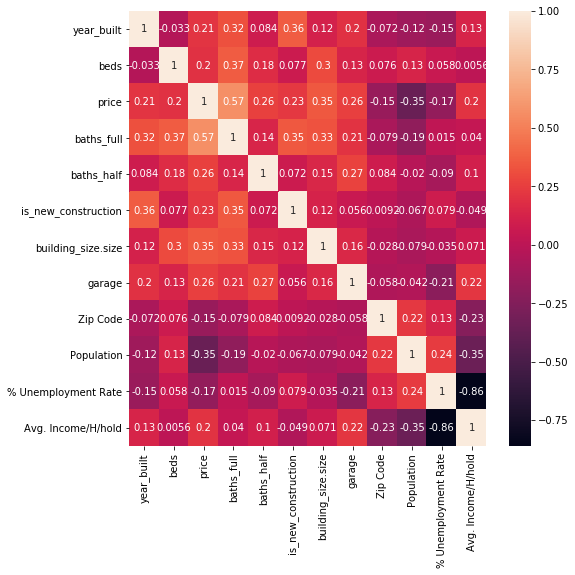

In [24]:
# plot scatterplots of features vs price
# create correlation heatmap
correlation = df.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns, annot = True, ax=ax)

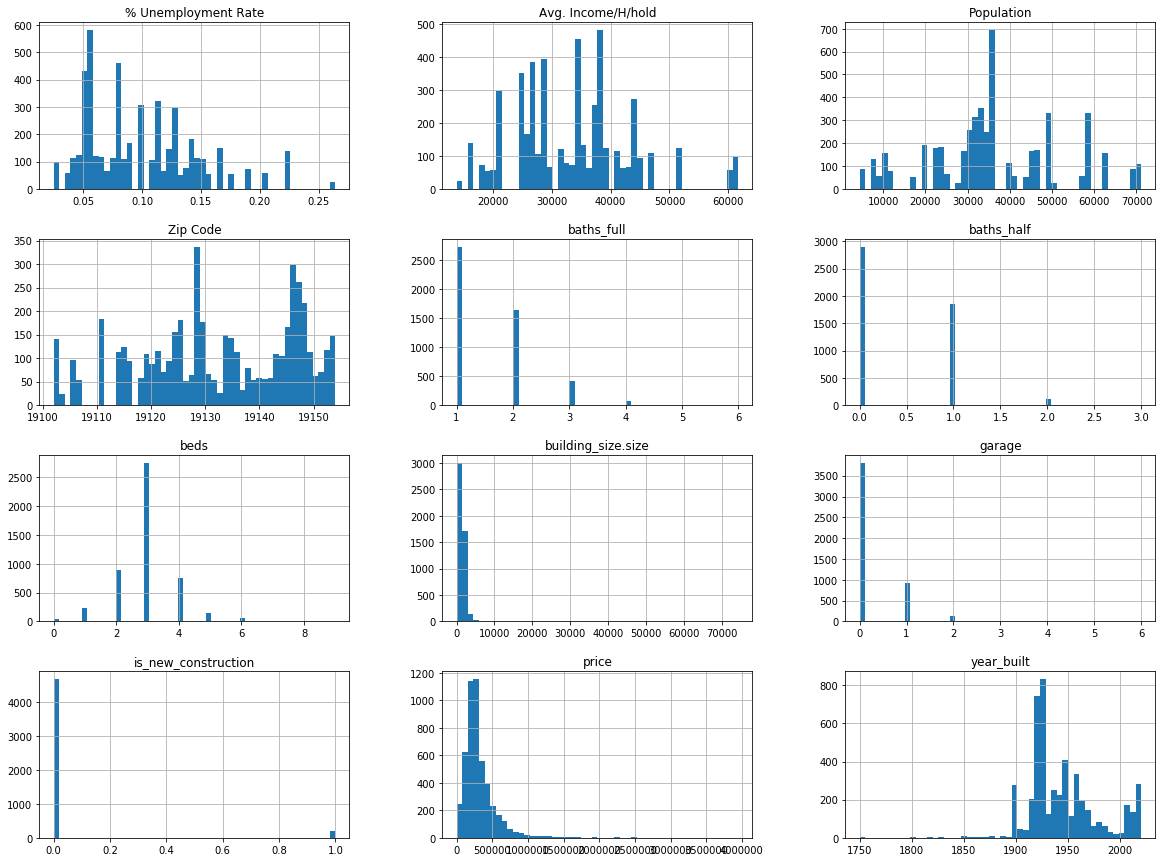

In [6]:
# Check distributions
df.hist(bins=50, figsize=(20,15))
plt.show()

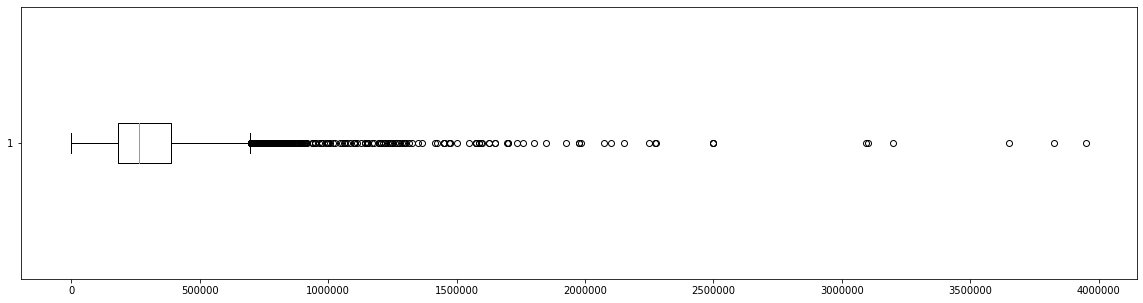

In [7]:
# analyze price data more closesly
plt.figure(figsize=(20,5))
plt.boxplot(df['price'], vert=False)
plt.show()

In [8]:
median = np.median(df['price'])
upper_quartile = np.percentile(df['price'], 75)
lower_quartile = np.percentile(df['price'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df['price'][df['price']<=upper_quartile+1.5*iqr].max()
lower_whisker = df['price'][df['price']>=lower_quartile-1.5*iqr].min()
print('Upper whisker = {}'.format(upper_whisker))
print('Lower whisker = {}'.format(lower_whisker))

Upper whisker = 695000.0
Lower whisker = 115.0


In [9]:
print(df.isnull().sum())

last_update                    0
prop_type                      0
year_built                     0
beds                           0
price                          0
baths_full                     0
baths_half                     0
is_new_construction            0
address.neighborhood_name    477
building_size.size             0
garage                         0
Zip Code                       0
Population                     0
% Unemployment Rate            0
Avg. Income/H/hold             0
dtype: int64


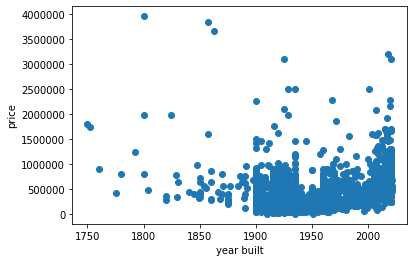

In [10]:
plt.scatter(df['year_built'], df['price'])
plt.xlabel('year built')
plt.ylabel('price')
plt.savefig('year_built_vs_price.png', bbox_inches='tight')
plt.show()

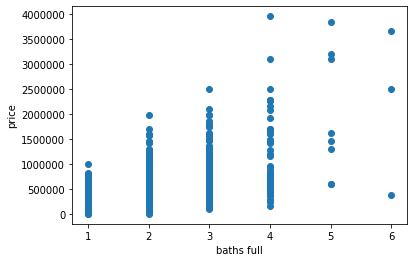

In [11]:
plt.scatter(df['baths_full'], df['price'])
plt.xlabel('baths full')
plt.ylabel('price')
plt.savefig('baths_full_vs_price.png', bbox_inches='tight')
plt.show()

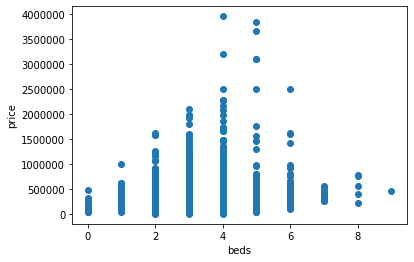

In [12]:
plt.scatter(df['beds'], df['price'])
plt.xlabel('beds')
plt.ylabel('price')
plt.savefig('beds_vs_price.png', bbox_inches='tight')
plt.show()

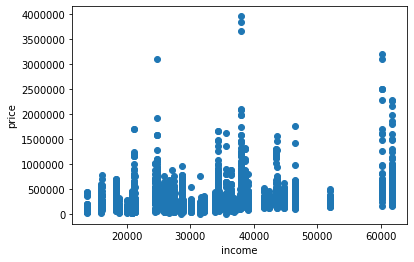

In [13]:
plt.scatter(df['Avg. Income/H/hold'], df['price'])
plt.xlabel('income')
plt.ylabel('price')
plt.savefig('income_vs_price.png', bbox_inches='tight')
plt.show()

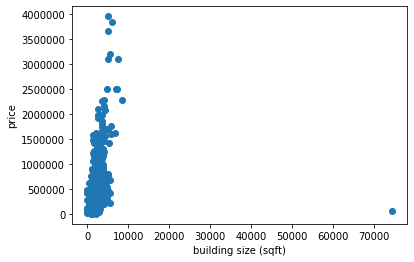

In [14]:

plt.scatter(df['building_size.size'], df['price'])
plt.xlabel('building size (sqft)')
plt.ylabel('price')
plt.savefig('building_size_vs_price.png', bbox_inches='tight')
plt.show()

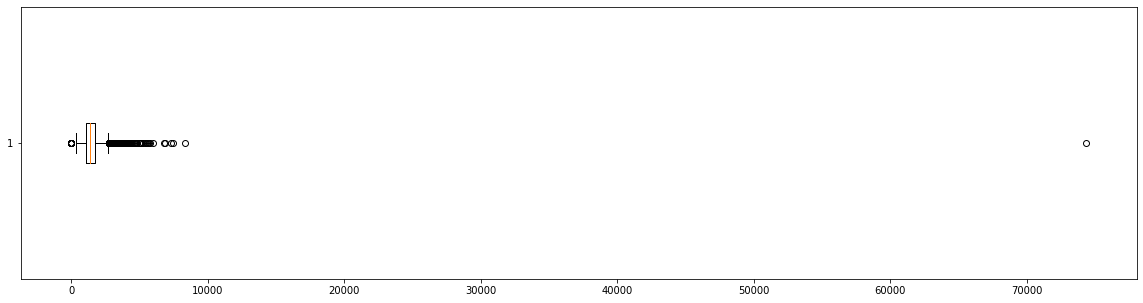

Upper whisker = 2723.0
Lower whisker = 320.0
Number of Rows in dataframe in which building size > 74340.0 :  260


In [23]:
# analyze building size data more closesly
plt.figure(figsize=(20,5))
plt.boxplot(df['building_size.size'], vert=False)
plt.show()

median = np.median(df['building_size.size'])
upper_quartile = np.percentile(df['building_size.size'], 75)
lower_quartile = np.percentile(df['building_size.size'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df['building_size.size'][df['building_size.size']<=upper_quartile+1.5*iqr].max()
lower_whisker = df['building_size.size'][df['building_size.size']>=lower_quartile-1.5*iqr].min()
print('Upper whisker = {}'.format(upper_whisker))
print('Lower whisker = {}'.format(lower_whisker))

#count # of outlier building sizes
details = df.apply(lambda x : True
            if x['building_size.size'] > 2723.0 else False, axis = 1)
  
# Count number of True in the series
num_rows = len(details[details == True].index)
  
print('Number of Rows in dataframe in which building size > 2723.0 : ',
      num_rows )

In [21]:
print(df.shape)

(4880, 15)
